<a href="https://colab.research.google.com/github/remasotb/project/blob/main/Brazilian_E_Commerce_Analysis_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt # plotting
import numpy as np
import os
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
order_items_df = pd.read_csv('/content/drive/MyDrive/data/olist_order_items_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/data/olist_orders_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/data/olist_products_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
orders_df.isnull().sum()
#عدد القيم المفقودة في كل عمود

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
order_items_df.head()
## عرض أول 5 صفوف من DataFrame 'order_items_df'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
print("Missing values in Orders dataset:", orders_df.isnull().sum())
print("Missing values in Order Items dataset:", order_items_df.isnull().sum())
print("Missing values in Products dataset:", products_df.isnull().sum())
## طباعة عدد القيم المفقودة في كل من مجموعات البيانات: الطلبات، عناصر الطلبات، والمنتجات

Missing values in Orders dataset: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Missing values in Order Items dataset: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in Products dataset: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# دمج بيانات الطلبات مع عناصر الطلبات ثم دمجها مع بيانات المنتجات
total_orders=pd.merge(orders_df, order_items_df)
product_orders=pd.merge(total_orders,products_df, on="product_id")
# عرض معلومات عن DataFrame الناتج 'product_orders'
product_orders.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [ ]:
len(product_orders['product_id'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


32951

In [ ]:
product_orders['product_id_shorten']=product_orders['product_id'].str[-8:]
#إنشاء عمود جديد يحتوي على آخر 8 أحرف

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-825c10deacd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',


Text(0.5, 1.0, 'Top 10 Products')

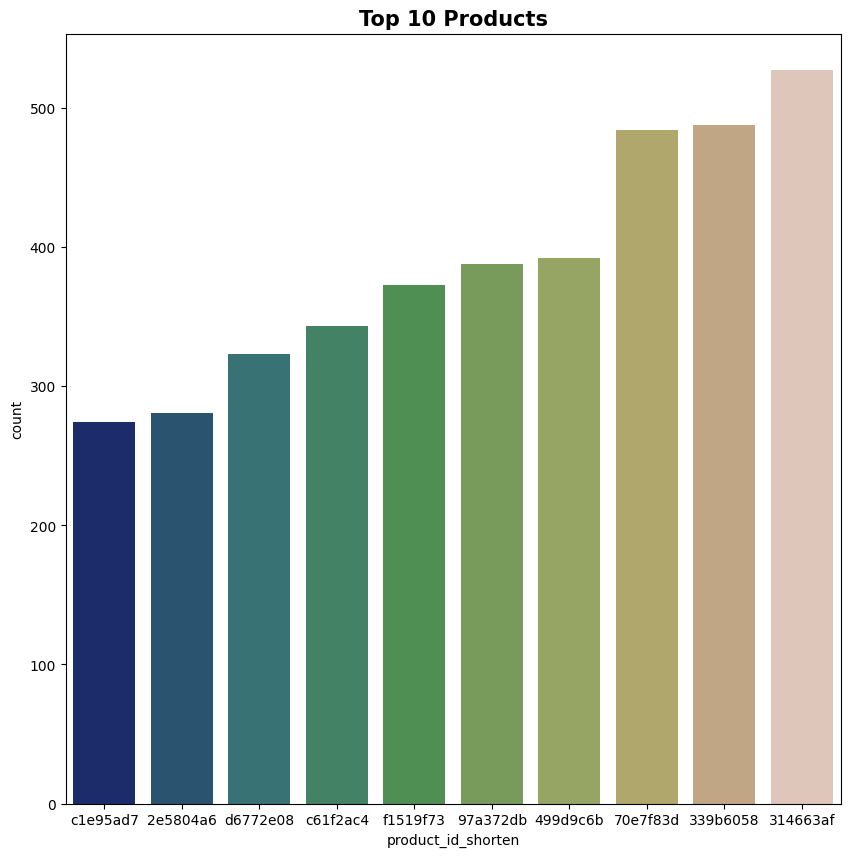

In [ ]:
import seaborn as sns
#Plotting Top 10 Products
plt.figure(figsize=(10,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

In [ ]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)
# تجميع البيانات حسب فئة المنتج، حساب عدد المنتجات في كل فئة، وترتيبها تنازليًا، ثم عرض أعلى 10 فئات

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id_shorten
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
utilidades_domesticas,6964
relogios_presentes,5991
telefonia,4545
ferramentas_jardim,4347


In [ ]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
  .count().sort_values(ascending=False).head(10)# تجميع البيانات حسب معرف المنتج المختصر وفئة المنتج، ثم حساب عدد المنتجات في كل مجموعة
# عرض النتائج
group_category

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,product_id_shorten
product_id_shorten,product_category_name,
314663af,moveis_decoracao,527
339b6058,cama_mesa_banho,488
70e7f83d,ferramentas_jardim,484
499d9c6b,ferramentas_jardim,392
97a372db,ferramentas_jardim,388
f1519f73,ferramentas_jardim,373
c61f2ac4,informatica_acessorios,343
d6772e08,relogios_presentes,323
2e5804a6,beleza_saude,281


In [ ]:
from scipy.sparse import csr_matrix
# الحصول على أعلى 100 منتج من حيث عدد المبيعات
top_products = product_orders['product_id_shorten'].value_counts().index[:100]

# الحصول على أعلى 2000 طلب من حيث عدد الطلبات
top_orders = product_orders['order_id'].value_counts().index[:2000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# تصفية البيانات للحصول على الطلبات التي تتضمن أعلى 100 منتج وأعلى 2000 طلب
filtered_data = product_orders[(product_orders['product_id_shorten'].isin(top_products)) &
                               (product_orders['order_id'].isin(top_orders))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# تجميع البيانات حسب 'order_id' و 'product_id_shorten'، وحساب عدد كل منتج في كل طلب
basket = filtered_data.groupby(['order_id', 'product_id_shorten'])['product_id_shorten']\
          .count().unstack(fill_value=0)

# Convert to binary (1 for presence, 0 for absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# تحويل DataFrame إلى مصفوفة غير متسقة (sparse matrix)
basket_sparse = csr_matrix(basket)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-57117369702f>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(32269894),(499d9c6b),0.044444,0.070370,0.007407,0.166667,2.368421,0.004280,1.115556,0.604651
1,(499d9c6b),(32269894),0.070370,0.044444,0.007407,0.105263,2.368421,0.004280,1.067974,0.621514
2,(70e7f83d),(32269894),0.114815,0.044444,0.014815,0.129032,2.903226,0.009712,1.097119,0.740586
3,(32269894),(70e7f83d),0.044444,0.114815,0.014815,0.333333,2.903226,0.009712,1.327778,0.686047
4,(32269894),(97a372db),0.044444,0.100000,0.011111,0.250000,2.500000,0.006667,1.200000,0.627907


In [ ]:
rules = rules.sort_values(by='confidence', ascending=False)

# Display the top 10 rules
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,"(97a372db, 499d9c6b)",(f1519f73),0.007407,0.088889,0.007407,1.000000,11.250000,0.006749,inf,0.917910
16,(8349797e),(70ce4b60),0.011111,0.022222,0.007407,0.666667,30.000000,0.007160,2.933333,0.977528
18,(dfdf244b),(70ce4b60),0.018519,0.022222,0.011111,0.600000,27.000000,0.010700,2.444444,0.981132
19,(70ce4b60),(dfdf244b),0.022222,0.018519,0.011111,0.500000,27.000000,0.010700,1.962963,0.984848
30,"(97a372db, f1519f73)",(499d9c6b),0.014815,0.070370,0.007407,0.500000,7.105263,0.006365,1.859259,0.872180
8,(b2793310),(339b6058),0.022222,0.033333,0.011111,0.500000,15.000000,0.010370,1.933333,0.954545
32,"(f1519f73, 499d9c6b)",(97a372db),0.018519,0.100000,0.007407,0.400000,4.000000,0.005556,1.500000,0.764151
26,"(f1519f73, 499d9c6b)",(70e7f83d),0.018519,0.114815,0.007407,0.400000,3.483871,0.005281,1.475309,0.726415
9,(339b6058),(b2793310),0.033333,0.022222,0.011111,0.333333,15.000000,0.010370,1.466667,0.965517
25,"(70e7f83d, 499d9c6b)",(f1519f73),0.022222,0.088889,0.007407,0.333333,3.750000,0.005432,1.366667,0.750000


In [ ]:
filtered_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1)]

# Display the filtered rules
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,"(97a372db, 499d9c6b)",(f1519f73),0.007407,0.088889,0.007407,1.000000,11.25,0.006749,inf,0.917910
16,(8349797e),(70ce4b60),0.011111,0.022222,0.007407,0.666667,30.00,0.007160,2.933333,0.977528
18,(dfdf244b),(70ce4b60),0.018519,0.022222,0.011111,0.600000,27.00,0.010700,2.444444,0.981132


In [ ]:
specific_product = 'f1519f73'
product_association_rules = filtered_rules[filtered_rules['consequents'].apply(lambda x: specific_product in x)]

# Display the rules for this specific product
product_association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,"(97a372db, 499d9c6b)",(f1519f73),0.007407,0.088889,0.007407,1.0,11.25,0.006749,inf,0.91791


In [ ]:
specific_product = 'dfdf244b'
product_association_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: specific_product in x)]

# Display the rules for this specific product
product_association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(dfdf244b),(70ce4b60),0.018519,0.022222,0.011111,0.6,27.0,0.0107,2.444444,0.981132


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


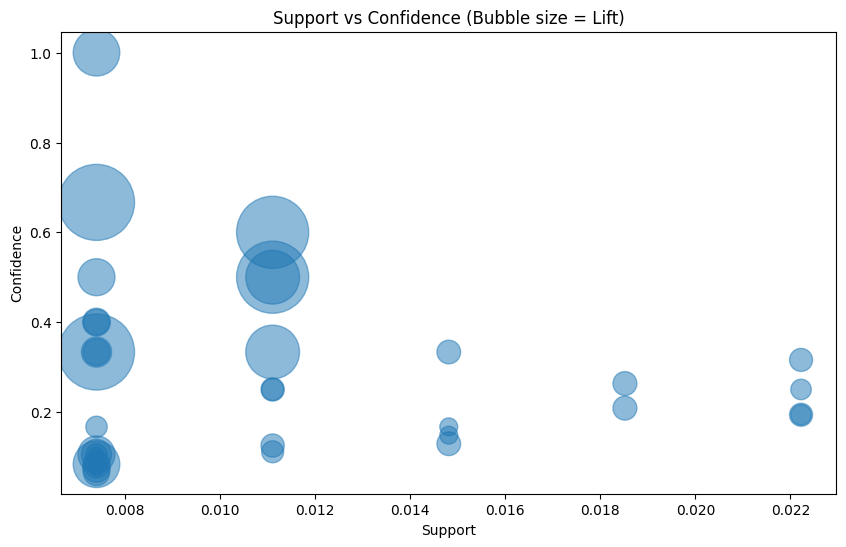

In [ ]:
import matplotlib.pyplot as plt

# Plot support vs confidence with lift as the bubble size
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Bubble size = Lift)')
plt.show()